In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

Read data on Airbnb property listings in Boston (source: https://www.kaggle.com/airbnb/boston)

In [2]:
listings = pd.read_csv("listings.csv")
print(listings.shape)
listings[['id','name','neighborhood_overview']].head() # each row is a unique listing

(3585, 95)


,id,name,neighborhood_overview
0,12147973,Sunny Bungalow in the City,"Roslindale is quiet, convenient and friendly. ..."
1,3075044,Charming room in pet friendly apt,"The room is in Roslindale, a diverse and prima..."
2,6976,Mexican Folk Art Haven in Boston,The LOCATION: Roslindale is a safe and diverse...
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Roslindale is a lovely little neighborhood loc...
4,7651065,Come Home to Boston,"I love the proximity to downtown, the neighbor..."


## What are the characteristics of each neighbourhood through the hosts' eyes?

Each listing may contain the host's description of the neighbourhood his property is located in. We try to get a sense of each neighbourhood's features through the hosts' eyes by finding the most common words used in the descriptions of the homes in that neighbourhood.m


We first concatenate all non-null entries of the column **neighbouhood_overview** into a single string for each neighbourhood 

In [3]:
# select relevant columns and exclude null entries
nb_des = listings.copy()[['neighbourhood','neighborhood_overview']]
nb_des = nb_des[~listings.neighbourhood.isnull() & ~nb_des.neighborhood_overview.isnull()]

# for each neighbourhood, count the no. of non-null entries of neighbourhood_overview  
# and combine them into a single string
nb_des_cnt = nb_des.groupby('neighbourhood').count()
nb_des_join = nb_des.groupby('neighbourhood')['neighborhood_overview'].apply(';'.join)
nb_des2 = pd.concat([nb_des_join, nb_des_cnt], axis=1).reset_index()
nb_des2.columns = ['neighbourhood','des_all','des_cnt']
nb_des2.head()

,neighbourhood,des_all,des_cnt
0,Allston-Brighton,Just steps away from the Charles River and eas...,212
1,Back Bay,- 1 block away from Loews Regency Hotel - 5 mi...,172
2,Beacon Hill,Beacon Hill is a historic neighborhood of Bost...,117
3,Brookline,Washington Square is an upscale neighborhood i...,4
4,Cambridge,Very nice and safe neighborhood. walking safe ...,4


We use word clouds to show words that are most commonly associated with each neighbourhood. Once again, we exclude neighbourhoods with very few neighbourhood overviews (<10). 

For example, the word cloud representing the neighbourhood of Allston-Brighton suggests that the area is home to Harvard University, is a safe area and is good for walking.

Allston-Brighton


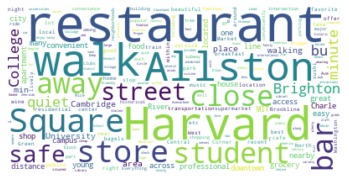

Back Bay


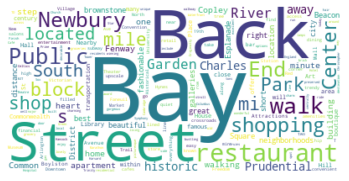

Beacon Hill


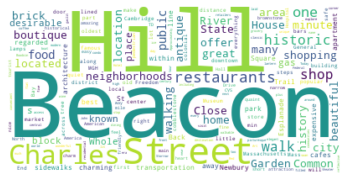

Charlestown


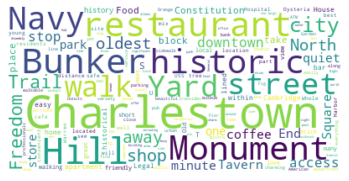

Chinatown


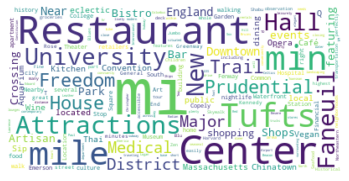

Dorchester


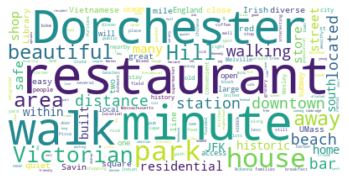

Downtown Crossing


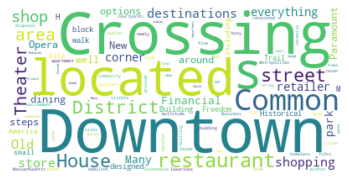

East Boston


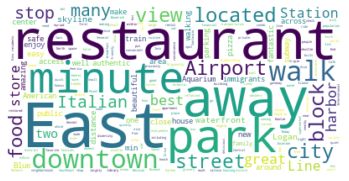

Fenway/Kenmore


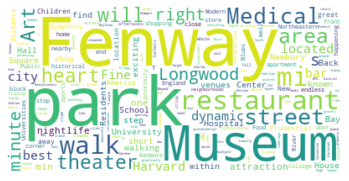

Hyde Park


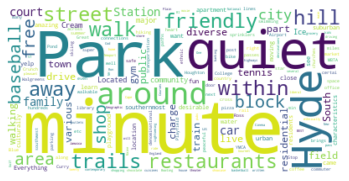

Jamaica Plain


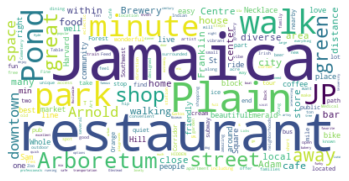

Mattapan


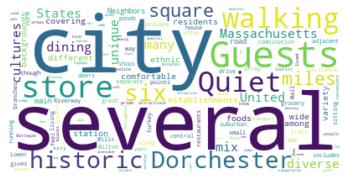

Mission Hill


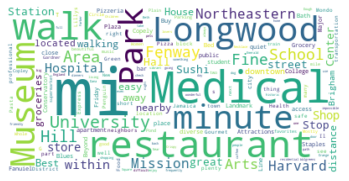

North End


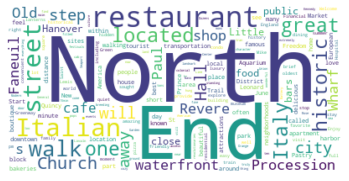

Roslindale


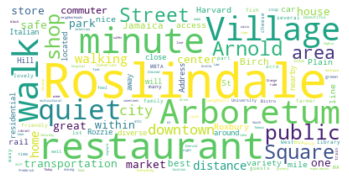

Roxbury


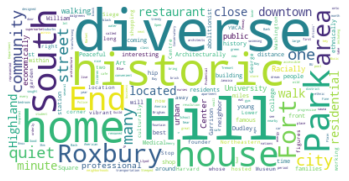

South Boston


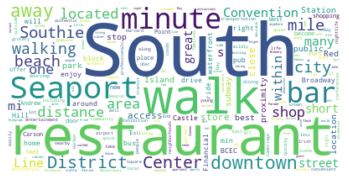

South End


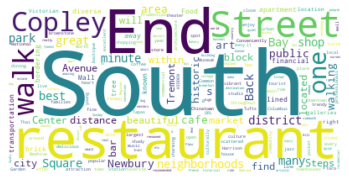

Theater District


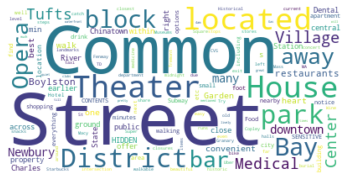

West End


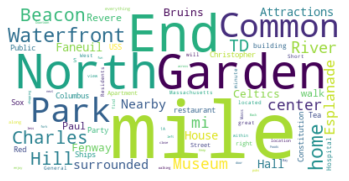

West Roxbury


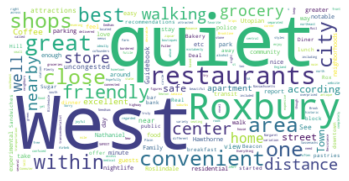

In [4]:
nb_des3 = nb_des2[nb_des2.des_cnt>=10]
stopwords = set(STOPWORDS)
stopwords.update(['Boston','neighborhood'])
for i in range(len(nb_des3)):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white',collocations=False).generate(nb_des3.des_all.iloc[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    print(nb_des3.neighbourhood.iloc[i])
    plt.show()

Out of curiosity, let's see how a word cloud based all the Boston hosts' neighbourhood descriptions looks like

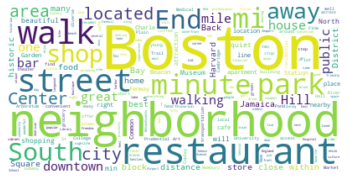

In [12]:
boston = " ".join(nb_des2['des_all'])
wordcloud_boston = WordCloud(stopwords=set(STOPWORDS), background_color='white',collocations=False).generate(boston)
plt.imshow(wordcloud_boston, interpolation='bilinear')
plt.axis('off')
plt.show()